In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Dataset

Dans ce TP, nous allons travailler avec le jeu de données que vous connaissez déjà qui concerne les dépenses de l'état. Commençons par le télécharger puis chargons le en mémoire dans un dataframe.

Si vous utilisez colab, vous devez d'abord télécharger le fichier de données sur le serveur colab en utilisant le morceau de code suivant:

In [2]:
try:
    from google.colab import files

    uploaded = files.upload()

    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
except:
    print("No google colab")
    pass

Saving depense_etat.txt to depense_etat.txt
User uploaded file "depense_etat.txt" with length 2280 bytes


**Exercice**
- Localisez le chemin d'accès vers le fichier de données sur la machine
- Chargez le dans une variable python en utilisant pandas

In [ ]:
data_source = '/content/'  
filename = 'depense_etat.txt' 
filepath = os.path.join(data_source, filename)

df = pd.read_csv(filepath, delimiter="\s+")
df.columns

Index(['PVP', 'AGR', 'CMI', 'TRA', 'LOG', 'EDU', 'ACS', 'ACO', 'DEF', 'DET',
       'DIV'],
      dtype='object')

# MultiDimensional Scaling (MDS)

**MDS est un outil qui permet de changer (réduire) la dimension des données tout en conservant les distances entre les exemples.** On utilise plutôt MDS pour visualiser les données lorsque seule la matrice de distance entre ces données est disponible. Toute fois dans ce TP, nous allons construire la matrice de distance par nous même à partir des données.

## Etapes du MDS:

1. Construire une matrice de distances carrées $\Delta^2$ entre les données 
2. Double centrer cette matrice: $\Delta^* = -0.5 \boldsymbol{J} \Delta^2 \boldsymbol{J}$ où $\boldsymbol{J}$ est la matrice de centrage: $\boldsymbol{J} = \boldsymbol{I} - \frac{1}{n}\boldsymbol{11}^T$
3. Réaliser une décomposition en valeur propres de $\Delta^*$ puis récupérer les données en dimension réduites $\underbrace{\mathbf{X}}_{n\times p} = \underbrace{\mathbf{V}_p}_{n\times p} \underbrace{\Lambda^{\tfrac{1}{2}}_{p}}_{p\times p} $ . Attention, les valeurs propres et vecteurs propres à récupérer sont ceux qui ont les valeurs propres les plus élevées (qui contiennent le plus d'énergie de la matrice).

**Exercice:** (chaque fonction devrait être écrite dans une cellule différente)
- Ecrire une fonction qui construit la matrice des distances euclidiennes au carré entre les données (prend les données en entrée)
- Ecrire une fonction qui double centre une matrice d'entrée (prend une matrice carrée symétrique en entrée)
- Ecrire une fonction qui retourne les p premieres vecteurs propres et les racines carrées des p premières valeurs propres associées (prend une matrice carrée symétrique en entrée et un paramètre p)
- Ecrire une fonction qui réalise l'algorithme MDS à partir d'un jeu de données et d'une dimension souhaitée
- Appliquer l'algorithme MDS au jeu de données téléchargé précédemment afin d'afficher les données sur un graphique en deux dimensions

(24, 24)


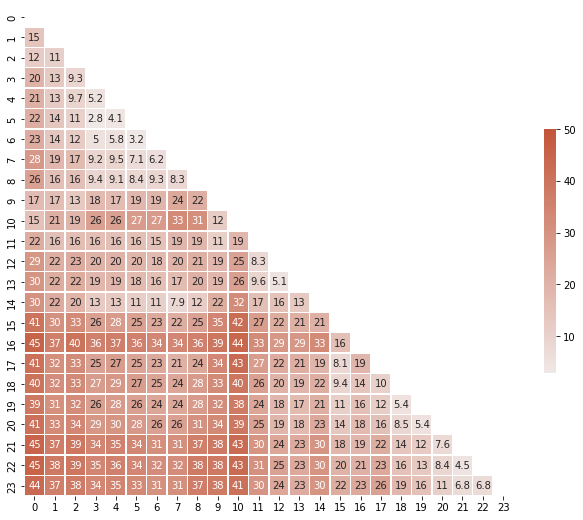

In [ ]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt



def distance(data):
  dist = []
  for i in range(data.shape[0]):
    for j in range(data.shape[0]):
      dist.append(np.linalg.norm(data.iloc[i]-data.iloc[j]))
  dist = np.array(dist)
  dist = dist.reshape(data.shape[0],data.shape[0])
  print(dist.shape)

  return (dist)
dist = distance(df)
        

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dist, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dist, mask = mask, cmap=cmap, vmax=50, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:

def double_scale(data):
  R = np.mean(data,axis = 1)
  print(R.shape)
  C = np.mean(data,axis = 0)
  print(C.shape)
  Moyenne = np.mean(np.array(data), axis=(0, 1))
  print(Moyenne)
  data = data - R

  data = data - C.T
  print(data.shape)


  data = data + Moyenne*np.ones(data.shape[0])
  double_scaled_matrix = data
  return double_scaled_matrix


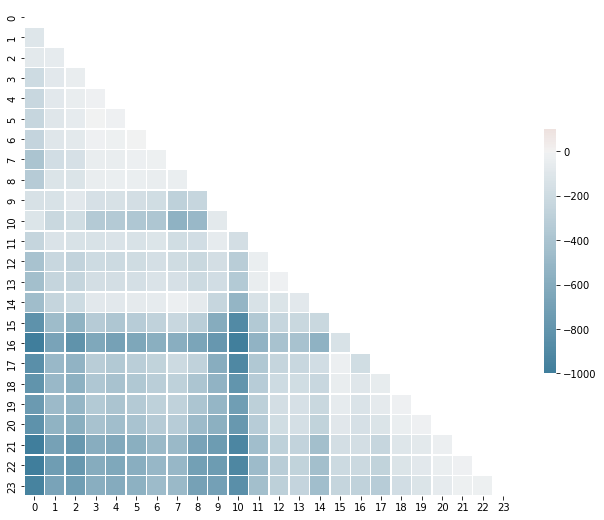

In [ ]:

def double_scale2(matrix):
  n = matrix.shape[0]
  J = np.eye(n) - (1/n) * np.dot(np.ones(n),np.ones(n).T) 
  
  double_scaled = -0.5*J*matrix**2*J
  return double_scaled

double_scaled = double_scale2(dist)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(double_scaled, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(double_scaled, mask = mask, cmap=cmap, vmax=100, vmin = -1000, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
eigsvals, eigvecs = np.linalg.eigh(double_scaled)
eigsvals[:]



def extract_vp(matrix,p):
  # extracting les eigvecs et eigvalues ordered in ascending order
  eigsvals, eigvecs = np.linalg.eigh(matrix)
  #ordering our eigvalues (inspired by tp 3 method to order  our vp in descending)

  idx = eigsvals.argsort()[::-1]   
  eigsvals = eigsvals[idx]
  eigvecs = eigvecs[:,idx]

  # 
  imp_vecs = eigvecs[:, :p]   # Works nickel 
  imp_vps = eigsvals[:p]
  print(imp_vecs.shape)
  return imp_vps, imp_vecs

vp, vc = extract_vp(double_scaled,5)

(24, 5)


(24, 24)
(24, 2)


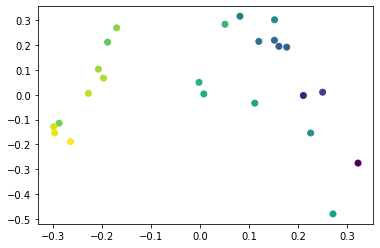

In [ ]:
def MDS(dataset,p):
  distance_matrix = distance(dataset)
  double_scaled = double_scale2(distance_matrix)
  imp_vps, imp_vecs = extract_vp(double_scaled,p)
  return imp_vecs
new_data  = MDS(df,2)

fig = plt.figure()
plt.scatter(new_data[:,0], new_data[:,1], c= list(df.loc[:].index))  
plt.show()


Comme pour la plupart de ces techniques connues, il existe en existe une version déjà implémentée dans une bibliothèque python: `scikit-learn`.

**Exercice:**
- Utiliser l'algorithme MDS fourni par scikit-learn pour calculer une représentation en basse dimension des données
- Commenter les resultats obtenus
- Timer les deux méthodes

## Isomap

L'algorithme Isomap se base sur le fonctionnement de MDS mais utilise une matrice de distances *geodésiques* à la place d'une matrice de distances euclidiennes.


**Exercice:**
- Utiliser la fonction scikit-learn pour appliquer l'algorithme Isomap aux données
- Afficher les résultats en deux dimensions. Commenter les différences avec MDS.


**Bonus Exercice 1:**
- Utiliser les algorithmes MDS et Isomap pour afficher une représentation 3D des données


**Bonus exercice 2: Implémenter une fonction de calcul des distances géodésiques**
- Trouver les k plus proches voisins de chaque point (scikit learn nearest neighbours)
- Construire le graphe des plus proches voisins (la solution la plus simple est d'utiliser 1 comme poids d'arrête)
- Calculer le chemin le plus court entre chaque point étant donné ce graphe (Algorithme Floyd-Warshall ou Djikstra)
- Retourner la matrice ainsi construite
- Utiliser cette matrice de distances dans votre algorithme MDS
- Afficher le résultat

In [ ]:
squid roll